<a href="https://colab.research.google.com/github/Arabinda768228/KNN_alogorithm_user_data/blob/main/K_NN_algorithm_user_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing datasets

In [ ]:
data_set=pd.read_csv('user_data.csv')

Extracting Independent and dependent variable

In [ ]:
X = data_set.iloc[:, [2, 3]].values
Y = data_set.iloc[:, 4].values
print(X)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]]


In [ ]:
print(Y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1]


Splitting the dataset training and test set.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
st_X = StandardScaler()
X_train = st_X.fit_transform(X_train)
X_test = st_X.transform(X_test)
print(X_train)
print(X_test)

[[-5.24135566e-01 -1.51364607e-01]
 [ 1.72581223e+00 -8.56455433e-01]
 [-6.26405920e-01 -7.33830941e-01]
 [-4.21865211e-01  8.29631325e-01]
 [ 1.62354187e+00 -9.79079924e-01]
 [-1.24002805e+00  5.84382342e-01]
 [-5.24135566e-01 -4.27269713e-01]
 [-4.21865211e-01  3.25721306e-02]
 [ 1.41900117e+00 -9.48423802e-01]
 [ 3.96297623e-01  2.47164991e-01]
 [ 8.94865600e-02  2.85293544e+00]
 [ 1.52127152e+00 -8.87111556e-01]
 [-4.21865211e-01  1.91600768e-03]
 [-1.24002805e+00 -1.16301666e+00]
 [-2.17324503e-01  7.07006834e-01]
 [-1.13775769e+00  8.90943571e-01]]
[[ 1.41900117 -1.07104829]
 [-0.52413557  0.70700683]
 [-1.3422984   0.76831908]
 [ 0.08948656 -1.19367278]
 [ 0.39629762 -1.13236054]
 [ 1.62354187 -0.24333298]]


In [ ]:
print(Y_train)
print(Y_test)

[0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0]
[1 0 0 0 0 1]


Fitting K-NN classifier to the training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

Predicting the set result

In [ ]:
Y_pred = classifier.predict(X_test)
print(Y_pred)

[1 0 0 0 1 1]


Creating the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[3 1]
 [0 2]]


Visualizing the training set result

<ipython-input-12-4a19c0d66f74>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],


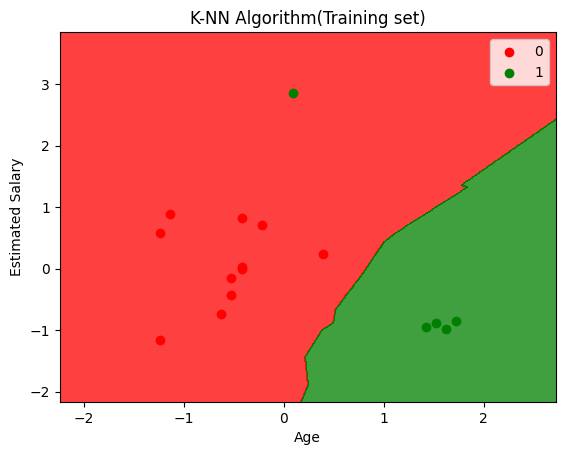

In [ ]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('K-NN Algorithm(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

